# 📖 Вовед 

Целта на овој проект е да се изгради модел на длабока невронска мрежа што ќе може прецизно да ги класифицира експресиите на лицето како што се: Лутина, Страв, Среќен, Тажен, Изненаден, Неутрален и Згаден. Во овој проект ќе користиме конволуциски невронски мрежи (CNN) за да го тренираме моделот, затоа што се најефективни кога станува збор за класифицирање на задачи поврзани со слики. За таа цел ќе се користи податочното множество FER-2013.



# 💾 Податоци

Податочното множество FER-2013 се состои од сиви слики на лица со 48х48 пиксели, кои се центрирани и окупираат ист простор во секоја слика. Податочното множество се состои од 24 илијади слики, со 22 илијади примери во тренирачкото множество и 1 илијада примери во тестирачкото множество.

# 🛠 Претпроцесирање

Во овој дел ќе употребам техники на аугментација на сликите за тренирање, како што се ротирање, вртење и сл. За да се зголеми диверзитетот и големината на тренирачкото множество, што може да помогне во подобрување на перформансите на моделот на длабоката невронска мрежа, да се намали пренагодувањето и да работи подобро на невидени податоци.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_dir = "images/train"
test_dir = "images/validation" 

In [3]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        
    height_shift_range = 0.1,       
    horizontal_flip = True,        
    rescale = 1./255,              
    validation_split = 0.2          
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,              
    validation_split = 0.2         
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,          
    target_size = (48, 48),          
    batch_size = 64,                
    color_mode = "grayscale",        
    class_mode = "categorical",     
    subset = "training"             
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,           
    target_size = (48, 48),         
    batch_size = 64,                 
    color_mode = "grayscale",       
    class_mode = "categorical",    
    subset = "validation"           
)

Found 12194 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.


# Моделирање

## CNN модел

За да се изгради конволуцискиот модел, најпрвин ќе започниме со дефинирање на влезниот слој и бројот на филтери во првиот конволуциски слој. Потоа ќе додадеме дополнителни слоеви со зголемување на бројот на филтери, после конволуциските слоеви ќе додадеме целосно конектирани слоеви со РеЛУ активациска функција за класифицирање на емоциите.

Ќе експериментираме со различни броеви на конволуциски слоеви, големина на филтри и конектирани слоеви за да се подобри перформансот на моделот..

In [5]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf 

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=45,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/45



191/191 [==============================] - ETA: 0s - loss: 2.3500 - accuracy: 0.2253
Epoch 1: val_accuracy improved from -inf to 0.25868, saving model to model_weights.h5
191/191 [==============================] - 102s 512ms/step - loss: 2.3500 - accuracy: 0.2253 - val_loss: 1.9551 - val_accuracy: 0.2587
Epoch 2/45
191/191 [==============================] - ETA: 0s - loss: 1.9096 - accuracy: 0.3097
Epoch 2: val_accuracy did not improve from 0.25868
191/191 [==============================] - 86s 451ms/step - loss: 1.9096 - accuracy: 0.3097 - val_loss: 1.9772 - val_accuracy: 0.1665
Epoch 3/45
191/191 [==============================] - ETA: 0s - loss: 1.7183 - accuracy: 0.3664
Epoch 3: val_accuracy improved from 0.25868 to 0.33026, saving model to model_weights.h5
191/191 [==============================] - 85s 446ms/step - loss: 1.7183 - accuracy: 0.3664 - val_loss: 1.6966 - val_accuracy: 0.3303
Epoch 4/45
191/191 [==============================] - ETA: 0s - loss: 1.5863 - accuracy: 0.408

## Евалуација

### Training and validation loss curves

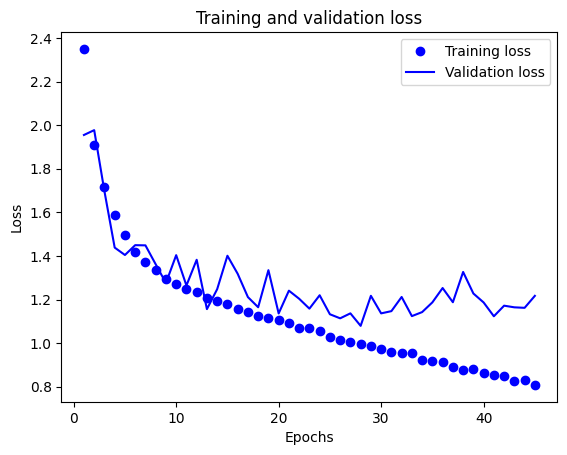

In [7]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and validation accuracy curves

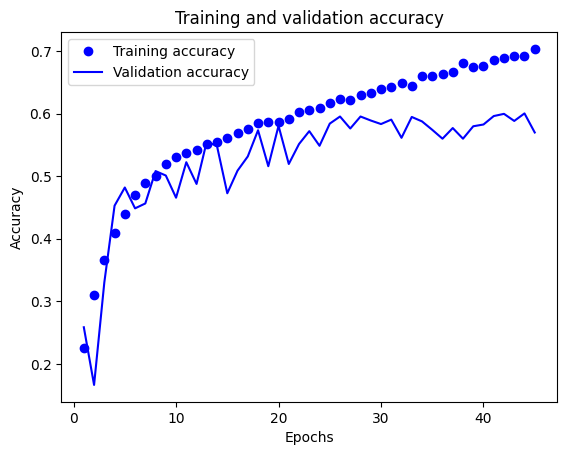

In [8]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Можеме да забележиме со зголемувањето на бројот на епохи над 40-50 се зголемува точноста на тренирачкото множество, но на валидациското останува иста, односно точноста на тренирачкото е поголема од точноста на валидациското, што значи дека веќе доаѓа до пренагодување. 

### Confusion Matrix

23/23 [==============================] - 2s 80ms/step


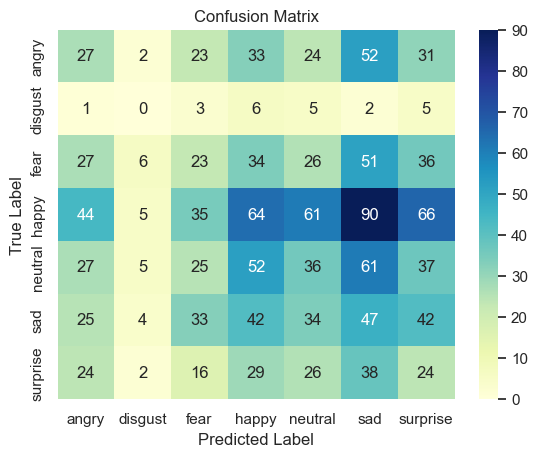

In [9]:
import seaborn as sns 
import numpy as np
from sklearn.metrics import confusion_matrix

validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Заклучок

Најдобри резултати односно со точност од 70% со 45 епохи, кога секвенцијалниот модел е составен од 6 конволуциски слоеви од кој првиот има 32 филтри, вториот 64, третиот и четвртиот 128 и петтиот и шестиот 256 филтри. Освен тоа користи и нормализација на активациите, го намалува бројот на димензии и рандом "dropout" за да се превенира пренагодувањето. Се користи софтмакс активација за повеќе-класна класификација, со излезен слој од 7 класи, кои се всушност емоциите. Исто така се користи и адам оптимизатор со рата на учење од 0.0001. Моделот за евалуација користи метрика точност. 